In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Tackling missing Data

In [6]:
miss=df.isnull().sum()
print(miss)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

replacing the NULL values in "Gender" with Male because it has more frequency.

<AxesSubplot:xlabel='Gender', ylabel='count'>

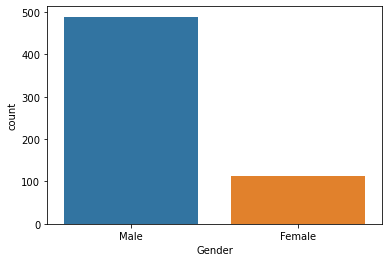

In [8]:
sns.countplot(x=df["Gender"])

<AxesSubplot:xlabel='Gender', ylabel='count'>

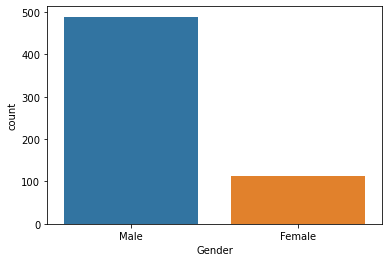

In [9]:
sns.countplot(x=df["Gender"])

In [10]:
df["Gender"].replace(np.nan, "Male", inplace=True)

In [11]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

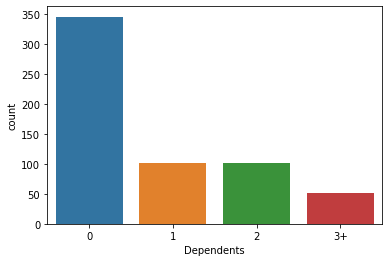

In [12]:
sns.countplot(x=df["Dependents"])

since most of the people have no dependents we would replace the NULL values as 0

In [13]:
df["Dependents"].replace(np.nan, "0", inplace=True)

In [14]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

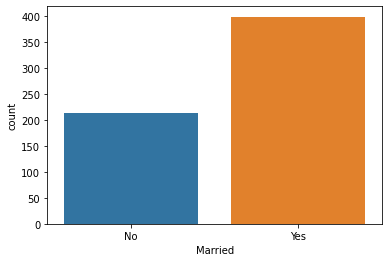

In [15]:
sns.countplot(x=df["Married"])

in the married column although "Yes" occurs more, it would make more sense if we replace NULL values with a "No".

In [16]:
df["Married"].replace(np.nan, "No", inplace=True)

In [17]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

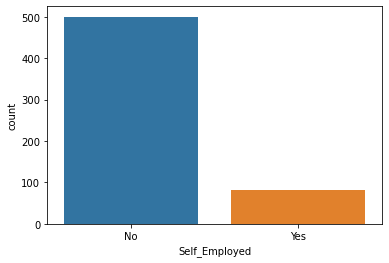

In [18]:
sns.countplot(x=df["Self_Employed"]) 

In [19]:
mode=df["Self_Employed"].mode()
mode

0    No
dtype: object

In [20]:
df["Self_Employed"].replace(np.nan, mode[0], inplace=True)

In [21]:
df["LoanAmount"].head()

0      NaN
1    128.0
2     66.0
3    120.0
4    141.0
Name: LoanAmount, dtype: float64

As we can see in the column "Loan Amount Term" value=360.0 is having a much higher frequency than any other value, so i would replace the NULL values withthis values only instead of the average(mean).

In [22]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [23]:
avg=df["Loan_Amount_Term"].mean(axis=0)
avg

342.0

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

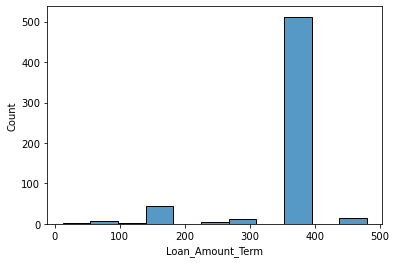

In [24]:
sns.histplot(x=df["Loan_Amount_Term"])

In [25]:
mode=df["Loan_Amount_Term"].mode()
df["Loan_Amount_Term"].replace(np.nan, mode[0], inplace=True)

in the column "Credit_History" I would replace NULL values with "0" rather than "1", even though "1" clearly has a higher frequency but in doing so I would be providing wrong information.

In [26]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [27]:
df["Credit_History"].replace(np.nan, "0.0", inplace=True)
df["Credit_History"]=df["Credit_History"].astype("float32")

In [28]:
df=df.dropna()
df.reset_index(drop=True, inplace=True)

In [29]:
df.shape

(592, 13)

In [30]:
miss=df.isnull().sum()
print(miss)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


## Data Visualisation

<AxesSubplot:xlabel='Gender', ylabel='count'>

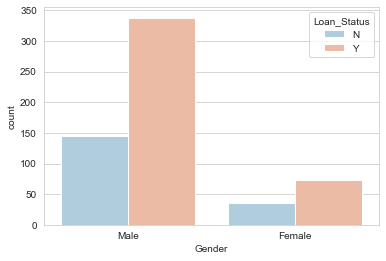

In [31]:
sns.set_style('whitegrid')
sns.countplot(x=df['Gender'], hue=df['Loan_Status'], palette='RdBu_r')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

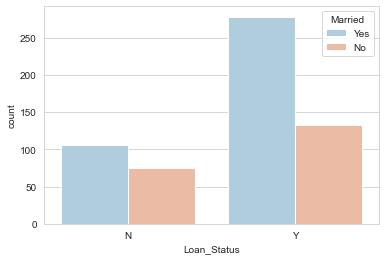

In [32]:
sns.set_style('whitegrid')
sns.countplot(x=df['Loan_Status'], hue=df['Married'], palette='RdBu_r')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

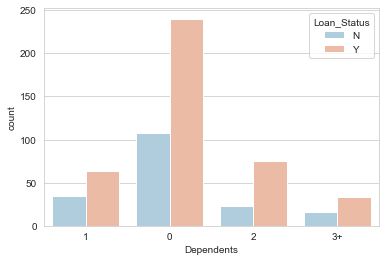

In [33]:
sns.set_style('whitegrid')
sns.countplot(x=df['Dependents'], hue=df['Loan_Status'], palette='RdBu_r')

<AxesSubplot:xlabel='Education', ylabel='count'>

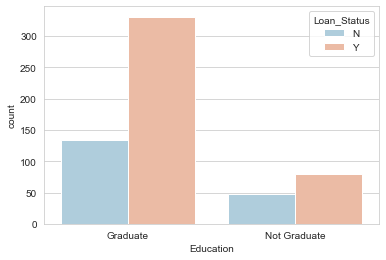

In [34]:
sns.countplot(x=df['Education'], hue=df['Loan_Status'], palette='RdBu_r')

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

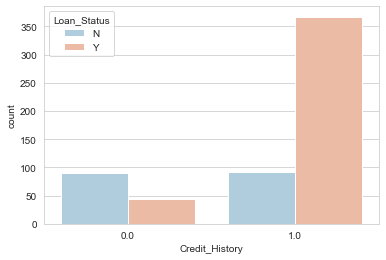

In [35]:
sns.set_style('whitegrid')
sns.countplot(x=df['Credit_History'], hue=df['Loan_Status'], palette='RdBu_r')

<AxesSubplot:>

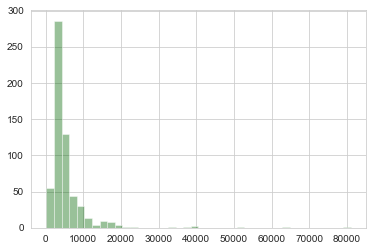

In [36]:
df["ApplicantIncome"].hist(bins=40, color='darkgreen', alpha=0.4)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

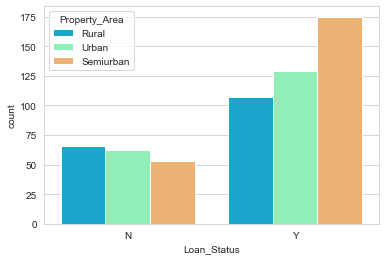

In [37]:
sns.set_style('whitegrid')
sns.countplot(x=df['Loan_Status'], hue=df['Property_Area'], palette='rainbow')

<AxesSubplot:>

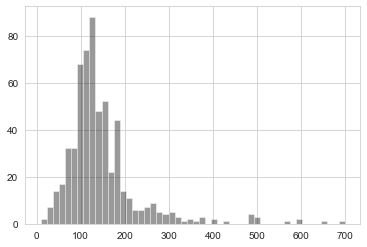

In [38]:
df["LoanAmount"].hist(bins=50, color='black', alpha=0.4)

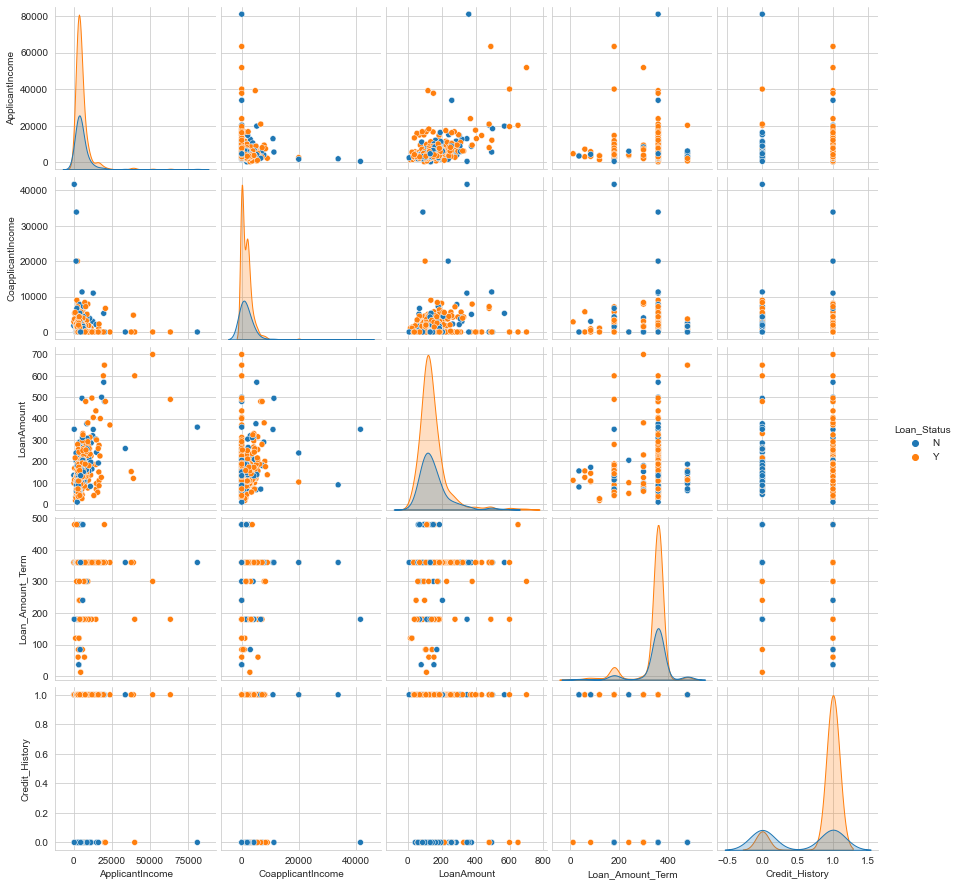

In [39]:
sns.pairplot(df, hue="Loan_Status")

## making data suitable for the models

In [40]:
df["Gender"]=pd.get_dummies(df["Gender"], drop_first=True)
df["Married"]=pd.get_dummies(df["Married"], drop_first=True)
df["Education"]=pd.get_dummies(df["Education"], drop_first=True)
df["Property_Area"]=pd.get_dummies(df["Property_Area"], drop_first=True)
df["Self_Employed"]=pd.get_dummies(df["Self_Employed"], drop_first=True)
df["Dependents"]=pd.get_dummies(df["Dependents"], drop_first=True)
df["Credit_History"]=df["Credit_History"].astype("int")

In [41]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df["Loan_Status"]=lb.fit_transform(df["Loan_Status"])

In [42]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
1,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,0,1
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,0,1
3,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,0,1
4,LP001011,1,1,0,0,1,5417,4196.0,267.0,360.0,1,0,1


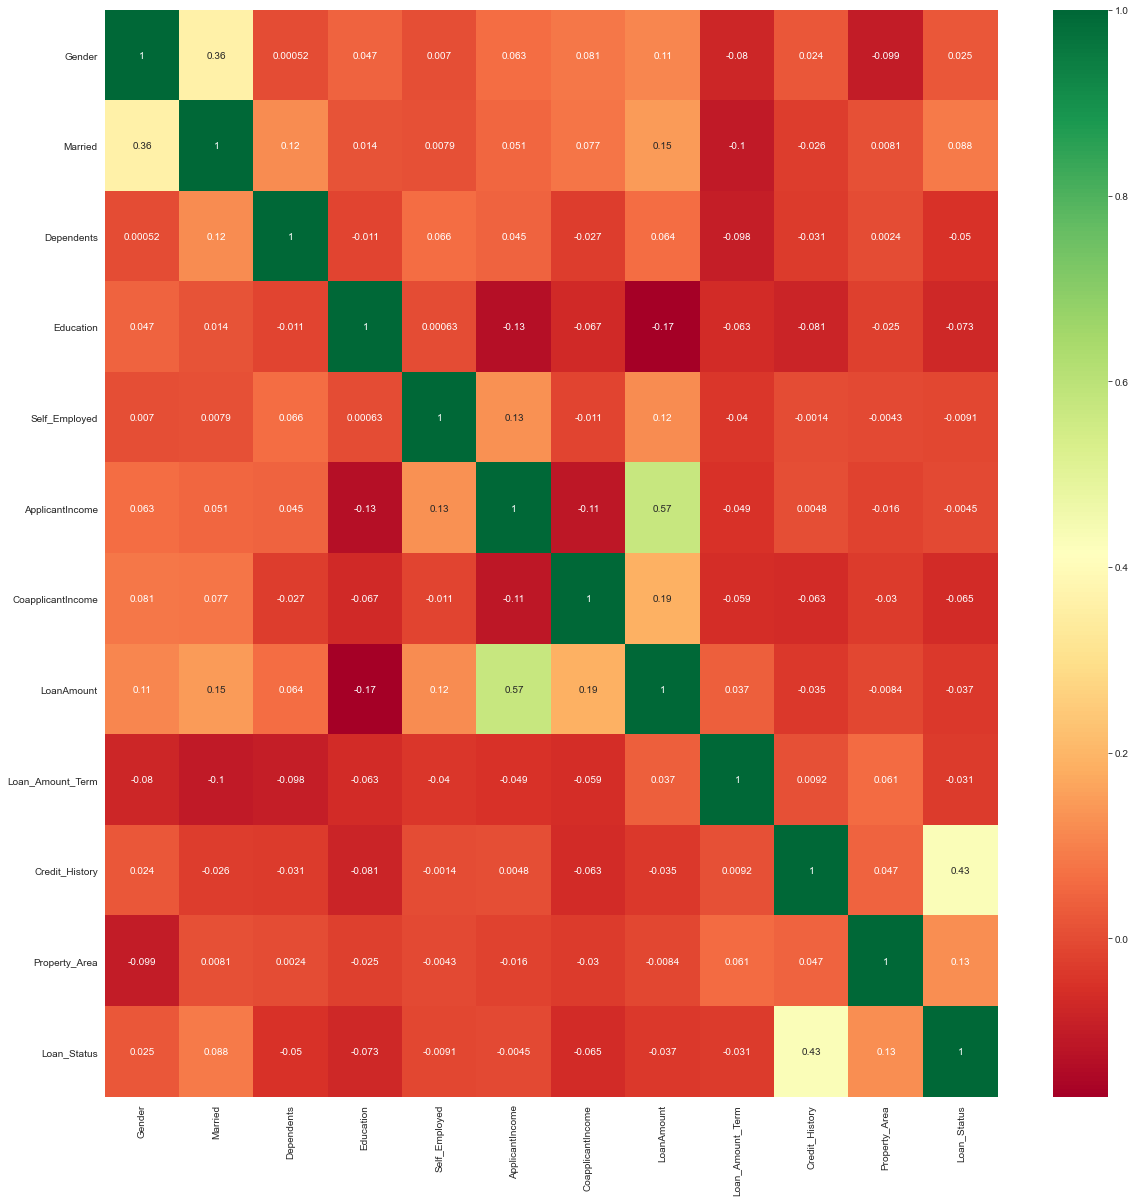

In [43]:
corrmat=df.corr()
top_corr_feat=corrmat.index
plt.figure(figsize=(20,20))
s=sns.heatmap(df[top_corr_feat].corr(), annot=True, cmap="RdYlGn")

In [44]:
X=df.iloc[:,1:]
X.drop(columns=["Loan_Status"], axis=1, inplace=True)
y=df.iloc[:,-1]
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1,0
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1,0
3,1,0,0,0,0,6000,0.0,141.0,360.0,1,0
4,1,1,0,0,1,5417,4196.0,267.0,360.0,1,0


In [45]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [46]:
print(model.feature_importances_)

[0.02923884 0.01990489 0.03065658 0.02825868 0.02903658 0.20675122
 0.14789315 0.23212056 0.0632419  0.18453711 0.02836047]


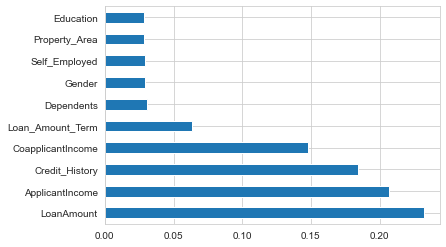

In [47]:
feat_importance=pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

In [48]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
1,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,0,1
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,0,1
3,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,0,1
4,LP001011,1,1,0,0,1,5417,4196.0,267.0,360.0,1,0,1


In [49]:
attributes=["Self_Employed","Loan_Amount_Term", "CoapplicantIncome", "Credit_History", "ApplicantIncome", "LoanAmount"]
df1=df[attributes]
output=df["Loan_Status"]
df1.head()

,Self_Employed,Loan_Amount_Term,CoapplicantIncome,Credit_History,ApplicantIncome,LoanAmount
0,0,360.0,1508.0,1,4583,128.0
1,1,360.0,0.0,1,3000,66.0
2,0,360.0,2358.0,1,2583,120.0
3,0,360.0,0.0,1,6000,141.0
4,1,360.0,4196.0,1,5417,267.0


In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df1,output,test_size=0.2, random_state=42)
X_train.shape

(473, 6)

In [51]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0)
log.fit(X_train,Y_train)

from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train,Y_train)

from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
forest.fit(X_train,Y_train)

from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,Y_train)


SVC()

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

print("accuracy report log",accuracy_score(Y_test, log.predict(X_test)))
print("\n mean squared error for log",mean_squared_error(Y_test, log.predict(X_test)))
 
print("\n accuracy report tree",accuracy_score(Y_test, tree.predict(X_test)))
print("\n mean squared error for tree ",mean_squared_error(Y_test, tree.predict(X_test)))

print("\n accuracy report forest",accuracy_score(Y_test, forest.predict(X_test)))
print("\n mean squared error for forest",mean_squared_error(Y_test, forest.predict(X_test)))

print("\n accuracy report SVC",accuracy_score(Y_test, svc.predict(X_test)))
print("\n mean squared error for SVC",mean_squared_error(Y_test, svc.predict(X_test)))



accuracy report log 0.7815126050420168

 mean squared error for log 0.2184873949579832

 accuracy report tree 0.7310924369747899

 mean squared error for tree  0.2689075630252101

 accuracy report forest 0.7310924369747899

 mean squared error for forest 0.2689075630252101

 accuracy report SVC 0.6638655462184874

 mean squared error for SVC 0.33613445378151263


In [54]:
yhat=log.predict(X_train)
print("accuracy for training data:",accuracy_score(yhat,Y_train))

accuracy for training data: 0.7758985200845666


In [55]:
from sklearn.metrics import classification_report

print("Classification report of Logistic Regression :-\n")
cla_rep=classification_report(Y_test, log.predict(X_test))
print(cla_rep)

Classification report of Logistic Regression :-

              precision    recall  f1-score   support

           0       0.73      0.55      0.63        40
           1       0.80      0.90      0.85        79

    accuracy                           0.78       119
   macro avg       0.77      0.72      0.74       119
weighted avg       0.78      0.78      0.77       119



In [56]:
pred=log.predict(X_test)
print("Predicted values are-\n",pred)
print("------")
print("True values are-\n",(Y_test).values)

Predicted values are-
 [0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0
 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1
 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1]
------
True values are-
 [0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0
 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1
 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1
 1 0 1 0 1 1 1 1]
